## How to Classify Photos of Dogs and Cats (with 97% accuracy)  


Jason Brownlee, How to Classify Photos of Dogs and Cats (with 97% accuracy), Machine Learning Mastery,   
Available from https://machinelearningmastery.com/how-to-develop-a-convolutional-neural-network-to-classify-photos-of-dogs-and-cats/ ,  
accessed October 23th, 2020.

In [ ]:
import os
import zipfile
import random
import tensorflow as tf
from shutil import copyfile

In [ ]:
# If the URL doesn't work, visit https://www.microsoft.com/en-us/download/confirmation.aspx?id=54765
# And right click on the 'Download Manually' link to get a new URL to the dataset

# Note: This is a very large dataset and will take time to download

!wget --no-check-certificate \
    "https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_3367a.zip" \
    -O "/tmp/cats-and-dogs.zip"

local_zip = '/tmp/cats-and-dogs.zip'
zip_ref   = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()


--2020-10-24 14:04:47--  https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_3367a.zip
Resolving download.microsoft.com (download.microsoft.com)... 23.46.53.60, 2600:1408:9000:89d::e59, 2600:1408:9000:887::e59
Connecting to download.microsoft.com (download.microsoft.com)|23.46.53.60|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 824894548 (787M) [application/octet-stream]
Saving to: ‘/tmp/cats-and-dogs.zip’

/tmp/cats-and-dogs. 100%[===================>] 786.68M   306MB/s    in 2.6s    

2020-10-24 14:04:50 (306 MB/s) - ‘/tmp/cats-and-dogs.zip’ saved [824894548/824894548]



In [ ]:
import os
print(len(os.listdir('/tmp/PetImages/Cat/')))
print(len(os.listdir('/tmp/PetImages/Dog/')))

# Expected Output:
# 12501
# 12501

12501
12501


In [ ]:

try:
    os.mkdir('/tmp/cats-v-dogs')
    os.mkdir('/tmp/cats-v-dogs/training')
    os.mkdir('/tmp/cats-v-dogs/testing')
    os.mkdir('/tmp/cats-v-dogs/training/cats')
    os.mkdir('/tmp/cats-v-dogs/training/dogs')
    os.mkdir('/tmp/cats-v-dogs/testing/cats')
    os.mkdir('/tmp/cats-v-dogs/testing/dogs')
except OSError:
    print("error OSError")

In [ ]:
def split_data(SOURCE, TRAINING, TESTING, SPLIT_SIZE):
    files = []
    for filename in os.listdir(SOURCE):
        file = SOURCE + filename
        if os.path.getsize(file) > 0:
            files.append(filename)
        else:
            print(filename + " is zero length, so ignoring.")

    training_length = int(len(files) * SPLIT_SIZE)
    testing_length = int(len(files) - training_length)
    shuffled_set = random.sample(files, len(files))
    training_set = shuffled_set[0:training_length]
    testing_set = shuffled_set[-testing_length:]

    for filename in training_set:
        this_file = SOURCE + filename
        destination = TRAINING + filename
        copyfile(this_file, destination)

    for filename in testing_set:
        this_file = SOURCE + filename
        destination = TESTING + filename
        copyfile(this_file, destination)


CAT_SOURCE_DIR = "/tmp/PetImages/Cat/"
TRAINING_CATS_DIR = "/tmp/cats-v-dogs/training/cats/"
TESTING_CATS_DIR = "/tmp/cats-v-dogs/testing/cats/"
DOG_SOURCE_DIR = "/tmp/PetImages/Dog/"
TRAINING_DOGS_DIR = "/tmp/cats-v-dogs/training/dogs/"
TESTING_DOGS_DIR = "/tmp/cats-v-dogs/testing/dogs/"

split_size = .9
split_data(CAT_SOURCE_DIR, TRAINING_CATS_DIR, TESTING_CATS_DIR, split_size)
split_data(DOG_SOURCE_DIR, TRAINING_DOGS_DIR, TESTING_DOGS_DIR, split_size)

# Expected output
# 666.jpg is zero length, so ignoring
# 11702.jpg is zero length, so ignoring

666.jpg is zero length, so ignoring.
11702.jpg is zero length, so ignoring.


In [ ]:
print(len(os.listdir('/tmp/cats-v-dogs/training/cats/')))
print(len(os.listdir('/tmp/cats-v-dogs/training/dogs/')))
print(len(os.listdir('/tmp/cats-v-dogs/testing/cats/')))
print(len(os.listdir('/tmp/cats-v-dogs/testing/dogs/')))

# Expected output:
# 11250
# 11250
# 1250
# 1250

11250
11250
1250
1250


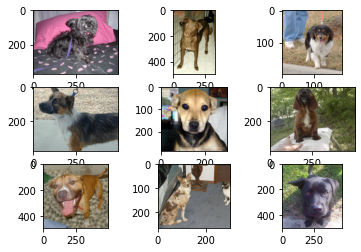

In [ ]:
# plot dog photos from the dogs vs cats dataset
from matplotlib import pyplot
from matplotlib.image import imread
# define location of dataset
#folder = 'train/'
folder = '/tmp/PetImages/'
# plot first few images
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# define filename
	filename = folder + 'Dog/' + str(i) + '.jpg'
	# load image pixels
	image = imread(filename)
	# plot raw pixel data
	pyplot.imshow(image)
# show the figure
pyplot.show()

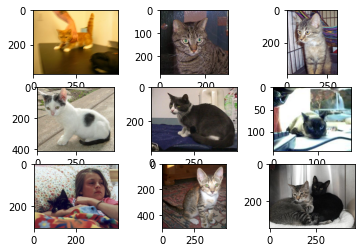

In [ ]:
# plot cat photos from the dogs vs cats dataset
from matplotlib import pyplot
from matplotlib.image import imread
# define location of dataset
folder = '/tmp/PetImages/'
# plot first few images
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# define filename
	filename = folder + 'Cat/' + str(i) + '.jpg'
	# load image pixels
	image = imread(filename)
	# plot raw pixel data
	pyplot.imshow(image)
# show the figure
pyplot.show()

A seguinte célula só deve ser usada se rodando localmente e não no colab.  
O código abaixo muda o tamanho das imagens e preenche toda a memória ram.

In [ ]:
'''
# load dogs vs cats dataset, reshape and save to a new file
from os import listdir
from numpy import asarray
from numpy import save
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
# define location of dataset
#folder = 'train/'
folder = '/tmp/PetImages/'
photos, labels = list(), list()
# enumerate files in the directory
for file in listdir(folder):
	# determine class
	output = 0.0
	if file.startswith('cat'):
		output = 1.0
	# load image
	photo = load_img(folder + file, target_size=(200, 200))
	# convert to numpy array
	photo = img_to_array(photo)
	# store
	photos.append(photo)
	labels.append(output)
# convert to a numpy arrays
photos = asarray(photos)
labels = asarray(labels)
print(photos.shape, labels.shape)
# save the reshaped photos
save('dogs_vs_cats_photos.npy', photos)
save('dogs_vs_cats_labels.npy', labels)
'''

"\n# load dogs vs cats dataset, reshape and save to a new file\nfrom os import listdir\nfrom numpy import asarray\nfrom numpy import save\nfrom keras.preprocessing.image import load_img\nfrom keras.preprocessing.image import img_to_array\n# define location of dataset\n#folder = 'train/'\nfolder = '/tmp/PetImages/'\nphotos, labels = list(), list()\n# enumerate files in the directory\nfor file in listdir(folder):\n\t# determine class\n\toutput = 0.0\n\tif file.startswith('cat'):\n\t\toutput = 1.0\n\t# load image\n\tphoto = load_img(folder + file, target_size=(200, 200))\n\t# convert to numpy array\n\tphoto = img_to_array(photo)\n\t# store\n\tphotos.append(photo)\n\tlabels.append(output)\n# convert to a numpy arrays\nphotos = asarray(photos)\nlabels = asarray(labels)\nprint(photos.shape, labels.shape)\n# save the reshaped photos\nsave('dogs_vs_cats_photos.npy', photos)\nsave('dogs_vs_cats_labels.npy', labels)\n"

Código para reescalonar as imagens

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
TRAINING_DIR = "/tmp/cats-v-dogs/training/"
train_datagen = ImageDataGenerator(rescale=1.0/255.)
train_generator = train_datagen.flow_from_directory(TRAINING_DIR,
                                                    batch_size=250,
                                                    class_mode='binary',
                                                    target_size=(150, 150))

VALIDATION_DIR = "/tmp/cats-v-dogs/testing/"
validation_datagen = ImageDataGenerator(rescale=1.0/255.)
validation_generator = validation_datagen.flow_from_directory(VALIDATION_DIR,
                                                              batch_size=250,
                                                              class_mode='binary',
                                                              target_size=(150, 150))

# Expected Output:
# Found 22498 images belonging to 2 classes.
# Found 2500 images belonging to 2 classes.

Found 22499 images belonging to 2 classes.
Found 2499 images belonging to 2 classes.


# Código Principal

In [ ]:
# baseline model for the dogs vs cats dataset
import sys
from matplotlib import pyplot
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator



In [ ]:
# plot diagnostic learning curves
def summarize_diagnostics(history):
	# plot loss
	pyplot.subplot(211)
	pyplot.title('Cross Entropy Loss')
	pyplot.plot(history.history['loss'], color='blue', label='train')
	pyplot.plot(history.history['val_loss'], color='orange', label='test')
	# plot accuracy
	pyplot.subplot(212)
	pyplot.title('Classification Accuracy')
	pyplot.plot(history.history['accuracy'], color='blue', label='train')
	pyplot.plot(history.history['val_accuracy'], color='orange', label='test')
	# save plot to file
	filename = sys.argv[0].split('/')[-1]
	pyplot.savefig(filename + '_plot.png')
	pyplot.close()


In [ ]:
# define cnn model
def define_model():
	model = Sequential([
	Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(200, 200, 3)),
	MaxPooling2D((2, 2)),
	Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'),
	MaxPooling2D((2, 2)),
	Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'),
	MaxPooling2D((2, 2)),    
	Flatten(),
	Dense(128, activation='relu', kernel_initializer='he_uniform'),
	Dense(1, activation='sigmoid')
  ])
	# compile model
	opt = SGD(lr=0.001, momentum=0.9)
	model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
	return model


In [ ]:
dir_test = '/tmp/cats-v-dogs/testing'
dir_train = '/tmp/cats-v-dogs/training'


# run the test harness for evaluating a model
def run_test_harness():
	# define model
	model = define_model() 
 
  # print model layers
	model.summary()
 
	# create data generators
	train_datagen = ImageDataGenerator(rescale=1.0/255.0,
		width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
	test_datagen = ImageDataGenerator(rescale=1.0/255.0)
	# prepare iterators
	train_it = train_datagen.flow_from_directory(dir_train,
		class_mode='binary', batch_size=64, target_size=(200, 200))
	test_it = test_datagen.flow_from_directory(dir_test,
		class_mode='binary', batch_size=64, target_size=(200, 200))


	# # create data generator
	# datagen = ImageDataGenerator(rescale=1.0/255.0)
	# # prepare iterators
	# train_it = datagen.flow_from_directory(dir_train,
	# 	class_mode='binary', batch_size=64, target_size=(200, 200))
	# test_it = datagen.flow_from_directory(dir_test,
	# 	class_mode='binary', batch_size=64, target_size=(200, 200))
 

	# fit model
	history = model.fit(train_it, steps_per_epoch=len(train_it),
		validation_data=test_it, validation_steps=len(test_it), epochs=20,
		 verbose=2)
	# evaluate model
	_, acc = model.evaluate(test_it, steps=len(test_it), verbose=0)
	print('> %.3f' % (acc * 100.0))
	# learning curves
	summarize_diagnostics(history)


In [ ]:
#@title
# entry point, run the test harness
run_test_harness()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 200, 200, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 100, 100, 32)      0         
_________________________________________________________________
flatten (Flatten)            (None, 320000)            0         
_________________________________________________________________
dense (Dense)                (None, 128)               40960128  
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 129       
Total params: 40,961,153
Trainable params: 40,961,153
Non-trainable params: 0
_________________________________________________________________
Found 22499 images belonging to 2 classes.
Found 2499 images belonging to 2 classes.
Epoch 1/20


/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 32 bytes but only got 0. Skipping tag 270
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 5 bytes but only got 0. Skipping tag 271
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 272
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 282
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only

352/352 - 83s - loss: 0.6784 - accuracy: 0.5762 - val_loss: 0.6537 - val_accuracy: 0.6150
Epoch 2/20
352/352 - 80s - loss: 0.6413 - accuracy: 0.6247 - val_loss: 0.6467 - val_accuracy: 0.6275
Epoch 3/20
352/352 - 79s - loss: 0.6223 - accuracy: 0.6415 - val_loss: 0.6196 - val_accuracy: 0.6439
Epoch 4/20
352/352 - 77s - loss: 0.6037 - accuracy: 0.6624 - val_loss: 0.6321 - val_accuracy: 0.6206
Epoch 5/20
352/352 - 77s - loss: 0.5853 - accuracy: 0.6818 - val_loss: 0.5885 - val_accuracy: 0.6819
Epoch 6/20
352/352 - 76s - loss: 0.5679 - accuracy: 0.7011 - val_loss: 0.5764 - val_accuracy: 0.6943
Epoch 7/20
352/352 - 76s - loss: 0.5366 - accuracy: 0.7306 - val_loss: 0.5778 - val_accuracy: 0.6779
Epoch 8/20
352/352 - 76s - loss: 0.5037 - accuracy: 0.7543 - val_loss: 0.5416 - val_accuracy: 0.7247
Epoch 9/20
352/352 - 77s - loss: 0.4681 - accuracy: 0.7803 - val_loss: 0.5331 - val_accuracy: 0.7283
Epoch 10/20
352/352 - 76s - loss: 0.4305 - accuracy: 0.8060 - val_loss: 0.5471 - val_accuracy: 0.7255


# Explore Transfer Learning

In [ ]:
#@title Não usar, vgg16 model
# vgg16 model used for transfer learning on the dogs and cats dataset
from keras.applications.vgg16 import VGG16
from keras.models import Model
# define cnn model
def define_model():
	# load model
	model = VGG16(include_top=False, input_shape=(224, 224, 3))
	# mark loaded layers as not trainable
	for layer in model.layers:
		layer.trainable = False
	# add new classifier layers
	flat1 = Flatten()(model.layers[-1].output)
	class1 = Dense(128, activation='relu', kernel_initializer='he_uniform')(flat1)
	output = Dense(1, activation='sigmoid')(class1)
	# define new model
	model = Model(inputs=model.inputs, outputs=output)
	# compile model
	opt = SGD(lr=0.001, momentum=0.9)
	model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
	return model

In [ ]:
%matplotlib inline
def plot_model(history):
  import matplotlib.image  as mpimg
  import matplotlib.pyplot as plt

  #-----------------------------------------------------------
  # Retrieve a list of list results on training and test data
  # sets for each training epoch
  #-----------------------------------------------------------
  acc=history.history['accuracy']
  val_acc=history.history['val_accuracy']
  loss=history.history['loss']
  val_loss=history.history['val_loss']

  epochs=range(len(acc)) # Get number of epochs

  #------------------------------------------------
  # Plot training and validation accuracy per epoch
  #------------------------------------------------
  plt.plot(epochs, acc, 'r', "Training Accuracy")
  plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
  plt.title('Training and validation accuracy')
  plt.figure()

  #------------------------------------------------
  # Plot training and validation loss per epoch
  #------------------------------------------------
  plt.plot(epochs, loss, 'r', "Training Loss")
  plt.plot(epochs, val_loss, 'b', "Validation Loss")
  plt.figure()


# Desired output. Charts with training and validation metrics. No crash :)

In [ ]:
# Xception model used for transfer learning on the dogs and cats dataset
def define_model():

    pretrained_model = tf.keras.applications.Xception(input_shape=(224, 224, 3), include_top=False)
    pretrained_model.trainable = True

    model = tf.keras.Sequential([
        pretrained_model,
        tf.keras.layers.GlobalAveragePooling2D(),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(1, activation="sigmoid", dtype=tf.float32 )
        
    ])

    opt = SGD(lr=0.001, momentum=0.9)
		#, or 'adam
    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
    return model


# cnn_model = keras.models.Sequential([
#     mobile_net, # mobile_net is low-level layers
#     keras.layers.GlobalAveragePooling2D(), 
#     keras.layers.Flatten(), 
#     keras.layers.Dense(64, activation="relu"), # fully-connected hidden layer 
#     keras.layers.Dense(2, activation="softmax") # output layer
# ])

In [ ]:
# callback to stop at 99%
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.9985):
      print("\nReached 99.5% accuracy so cancelling training!")
      self.model.stop_training = True

callbacks = myCallback()

#model.fit(training_images, training_labels, epochs=30,  callbacks=[callbacks] )

In [ ]:
dir_test = '/tmp/cats-v-dogs/testing'
dir_train = '/tmp/cats-v-dogs/training'
# run the test harness for evaluating a model
def run_test_harness():
	# define model
	model = define_model()
	# create data generator
	datagen = ImageDataGenerator(featurewise_center=True)
	# specify imagenet mean values for centering
	datagen.mean = [123.68, 116.779, 103.939]
	# prepare iterator
	train_it = datagen.flow_from_directory(dir_train,
		class_mode='binary', batch_size=64, target_size=(224, 224))
	test_it = datagen.flow_from_directory(dir_test,
		class_mode='binary', batch_size=92, target_size=(224, 224))
	# fit model
	history = model.fit(train_it, steps_per_epoch=len(train_it),
		validation_data=test_it, validation_steps=len(test_it), epochs=10, verbose=2, 
		callbacks=[callbacks] )

	# evaluate model
	_, acc = model.evaluate(test_it, steps=len(test_it), verbose=2)
	print('> %.3f' % (acc * 100.0))
 
	plot_model(history)
	# learning curves
	summarize_diagnostics(history)

	return model


Found 22498 images belonging to 2 classes.
Found 2500 images belonging to 2 classes.
Epoch 1/10


/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 32 bytes but only got 0. Skipping tag 270
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 5 bytes but only got 0. Skipping tag 271
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 272
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 282
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only

352/352 - 426s - loss: 0.2291 - accuracy: 0.9368 - val_loss: 0.0684 - val_accuracy: 0.9792
Epoch 2/10
352/352 - 432s - loss: 0.0578 - accuracy: 0.9796 - val_loss: 0.0512 - val_accuracy: 0.9848
Epoch 3/10
352/352 - 432s - loss: 0.0391 - accuracy: 0.9872 - val_loss: 0.0467 - val_accuracy: 0.9872
Epoch 4/10
352/352 - 432s - loss: 0.0293 - accuracy: 0.9901 - val_loss: 0.0395 - val_accuracy: 0.9892
Epoch 5/10
352/352 - 431s - loss: 0.0212 - accuracy: 0.9930 - val_loss: 0.0415 - val_accuracy: 0.9884
Epoch 6/10
352/352 - 431s - loss: 0.0189 - accuracy: 0.9940 - val_loss: 0.0408 - val_accuracy: 0.9880
Epoch 7/10
352/352 - 431s - loss: 0.0137 - accuracy: 0.9958 - val_loss: 0.0389 - val_accuracy: 0.9892
Epoch 8/10
352/352 - 430s - loss: 0.0121 - accuracy: 0.9963 - val_loss: 0.0402 - val_accuracy: 0.9884
Epoch 9/10
352/352 - 432s - loss: 0.0079 - accuracy: 0.9980 - val_loss: 0.0404 - val_accuracy: 0.9892
Epoch 10/10
352/352 - 431s - loss: 0.0084 - accuracy: 0.9979 - val_loss: 0.0404 - val_accurac

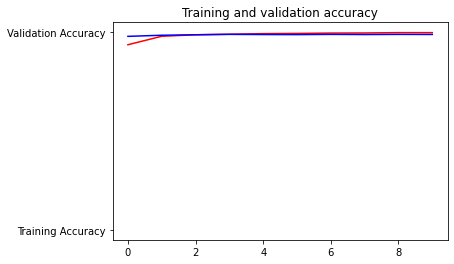

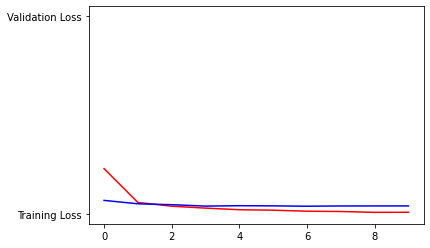

In [ ]:
# entry point, run the test harness
modelo = run_test_harness()

## Save the model

In [ ]:
modelo.save('final_model2.h5')

In [ ]:
import enum
# Enum for size units
class SIZE_UNIT(enum.Enum):
   BYTES = 1
   KB = 2
   MB = 3
   GB = 4
   
def convert_unit(size_in_bytes, unit):
   """ Convert the size from bytes to other units like KB, MB or GB"""
   if unit == SIZE_UNIT.KB:
       return size_in_bytes/1024
   elif unit == SIZE_UNIT.MB:
       return size_in_bytes/(1024*1024)
   elif unit == SIZE_UNIT.GB:
       return size_in_bytes/(1024*1024*1024)
   else:
       return size_in_bytes


import os
def get_file_size(file_name, size_type = SIZE_UNIT.BYTES ):
   """ Get file in size in given unit like KB, MB or GB"""
   size = os.path.getsize(file_name)
   return convert_unit(size, size_type)



In [ ]:
file_path = '/content/final_model2.h5'
# get file size in MB
size = get_file_size(file_path, SIZE_UNIT.MB)
print('Size of file is : ', int(size) ,  'MB')

Size of file is :  161 MB


In [ ]:
finalize_dogs_vs_cats = '/tmp/PetImages/'
# run the test harness for evaluating a model
def run_test_harness():
# define model
	model = define_model()
	# create data generator
	datagen = ImageDataGenerator(featurewise_center=True)
	# specify imagenet mean values for centering
	datagen.mean = [123.68, 116.779, 103.939]
	# prepare iterator
	train_it = datagen.flow_from_directory(finalize_dogs_vs_cats,
		class_mode='binary', batch_size=64, target_size=(224, 224))
	# fit model
	model.fit(train_it, steps_per_epoch=len(train_it), epochs=5, verbose=2)
	# save model
	model.save('finaltest_model.h5')
 
# entry point, run the test harness
run_test_harness()

In [ ]:
# make a prediction for a new image.
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import load_model

# load and prepare the image
def load_image(filename):
	# load the image
	img = load_img(filename, target_size=(224, 224))
	# convert to array
	img = img_to_array(img)
	# reshape into a single sample with 3 channels
	img = img.reshape(1, 224, 224, 3)
	# center pixel data
	img = img.astype('float32')
	img = img - [123.68, 116.779, 103.939]
	return img

# load an image and predict the class
def run_example():
	# load the image
	img = load_image('/content/test_cat.jpg')
	# load model
	#model = load_model('/content/final_model_VGG16.h5')
	model = load_model('/content/final_model_Xception.h5')
	# predict the class
	result = model.predict(img)
	print(result[0])
	if result[0]>0.5:
		print( " is a dog")
	else:
		print( " is a cat")


In [ ]:
# entry point, run the example
run_example()

[9.442498e-05]
 is a cat


In [ ]:
# Here's a codeblock just for fun. You should be able to upload an image here 
# and have it classified without crashing
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = '/content/' + fn
  #img = image.load_img(path, target_size=(150, 150))
  # x = image.img_to_array(img)
  # x = np.expand_dims(x, axis=0)

  # images = np.vstack([x])
  # classes = model.predict(images, batch_size=10)

	# load the image
  img = load_image(path)
	# load model
  #model = load_model('/content/final_model_VGG16.h5')
  model = load_model('/content/final_model_Xception.h5')
	# predict the class
  result = model.predict(img)

  print(result[0])
  if result[0]>0.5:
    print(fn + " is a dog")
  else:
    print(fn + " is a cat")

Saving gato1.jpg to gato1.jpg
[5.7245266e-05]
gato1.jpg is a cat


# Salvando modelo no drive

In [ ]:
#montagem padrao
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#copiar modelo 1558M para o  drive, para nao fazer download novamente
!cp -r '/content/final_model2.h5'  '/content/drive/My Drive/'

## Load a Trained Model Checkpoint

Running the next cell will copy the `.rar` checkpoint file from your Google Drive into the Colaboratory VM.

In [ ]:
#copiar checkpooint do drive para area de trabalho do colab
!cp -r '/content/drive/My Drive/final_model_VGG16.h5' '/content/'

In [ ]:
#copiar checkpooint do drive para area de trabalho do colab
!cp -r '/content/drive/My Drive/final_model_Xception.h5' '/content/'

# Checking modules versions

In [ ]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

In [ ]:
!pip list -v 

In [ ]:
import shutil

# Testando Flask Server

In [ ]:
import socket
print(socket.gethostbyname(socket.getfqdn(socket.gethostname())))



172.28.0.2


In [ ]:
#The server code:
from flask import Flask
app = Flask(__name__)

@app.route("/")
def hello():
    return "Hello World!"

import threading
threading.Thread(target=app.run, kwargs={'host':'0.0.0.0','port':80}).start() 

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://0.0.0.0:80/ (Press CTRL+C to quit)


In [ ]:
#Client code:
import requests
r = requests.get("http://172.28.0.2/")
print(r.status_code)
print(r.encoding)
print(r.apparent_encoding)
print(r.text)

172.28.0.2 - - [25/Oct/2020 22:57:22] "GET / HTTP/1.1" 200 -


200
utf-8
ascii
Hello World!
